# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
df = pd.read_csv('/content/bank_transactions_data.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 1. Memahami Struktur Data


In [ ]:
print("\n# Struktur Data")
print(df.info())
print("\n# 5 Baris Pertama")
print(df.head())


# Struktur Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  Account

## 2. Menangani Data yang Hilang


In [ ]:
print("\n# Jumlah Data yang Hilang")
print(df.isnull().sum())


# Jumlah Data yang Hilang
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


## 3. Analisis Distribusi Data Numerik


In [ ]:
numerical_columns = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]
print("\n# Statistik Deskriptif")
print(df[numerical_columns].describe())


# Statistik Deskriptif
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000  


## 4. Visualisasi Data

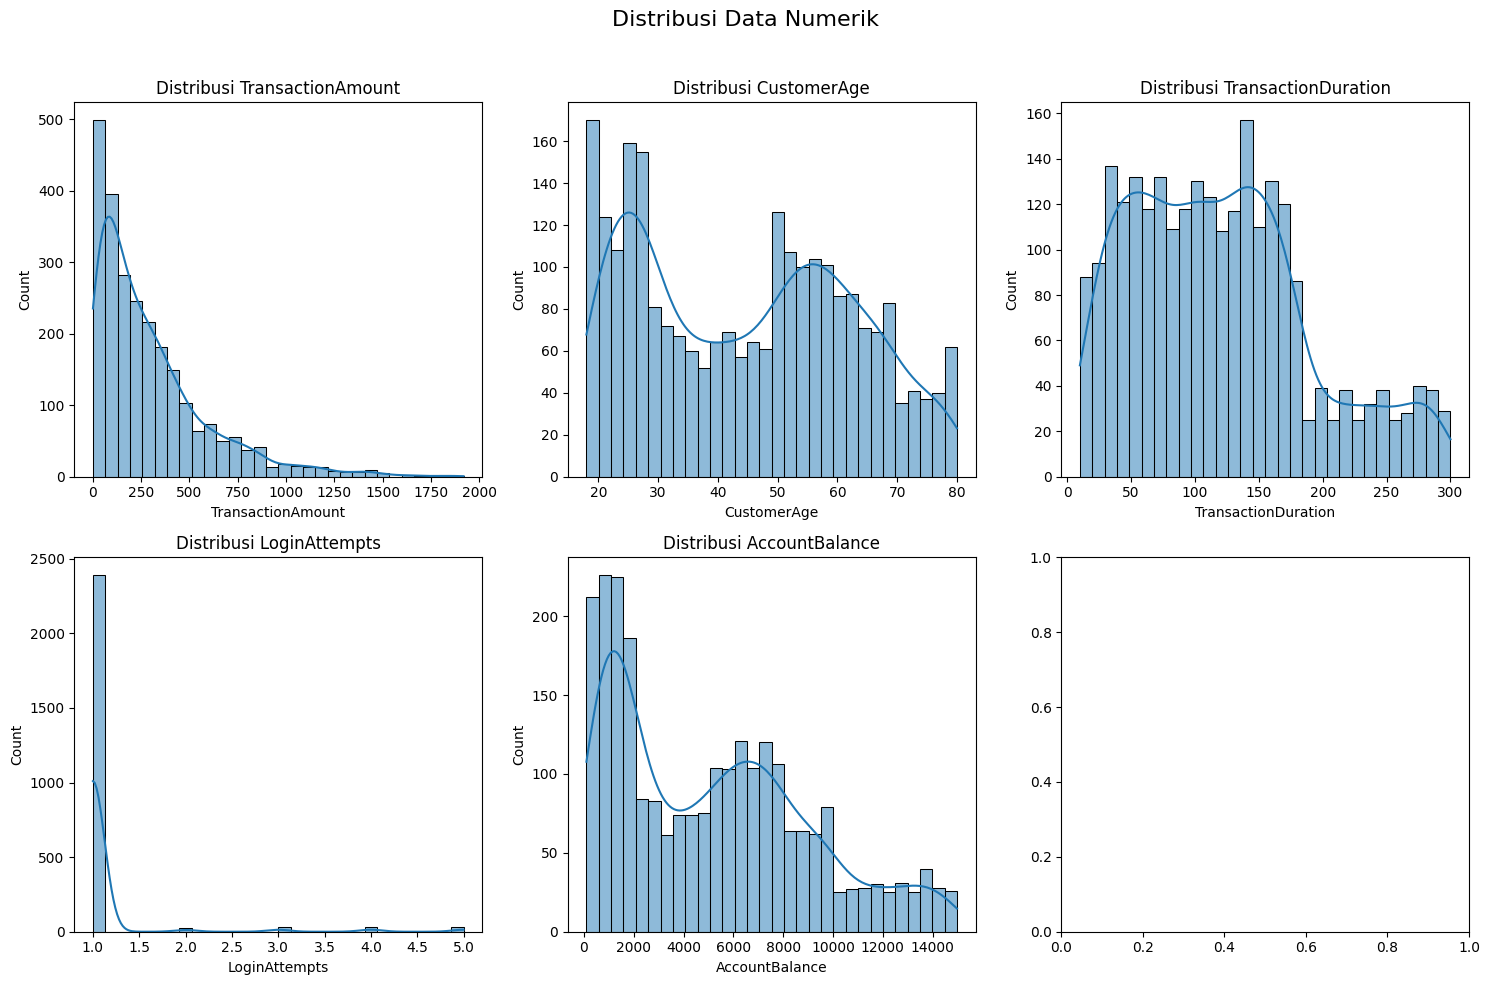

In [ ]:
# Visualisasi distribusi data numerik
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Distribusi Data Numerik", fontsize=16)

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"Distribusi {col}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


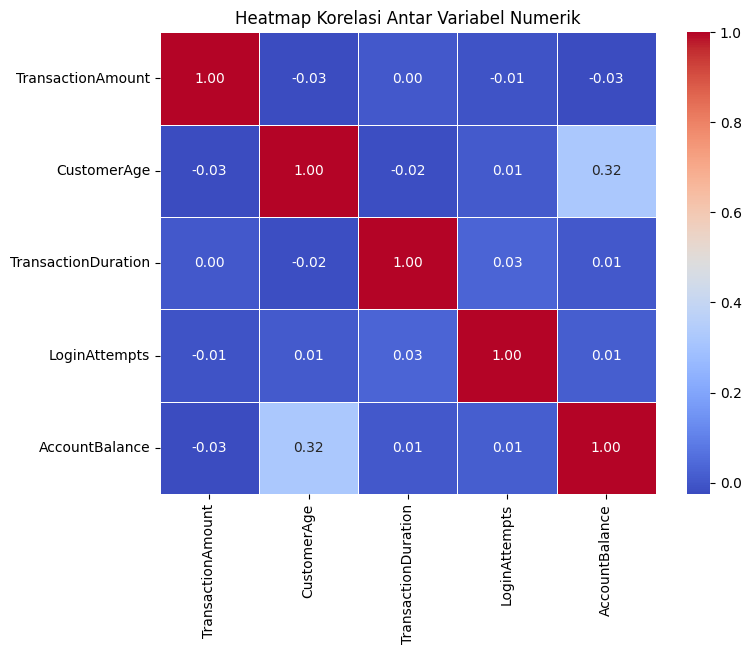

In [ ]:
# Analisis Korelasi
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

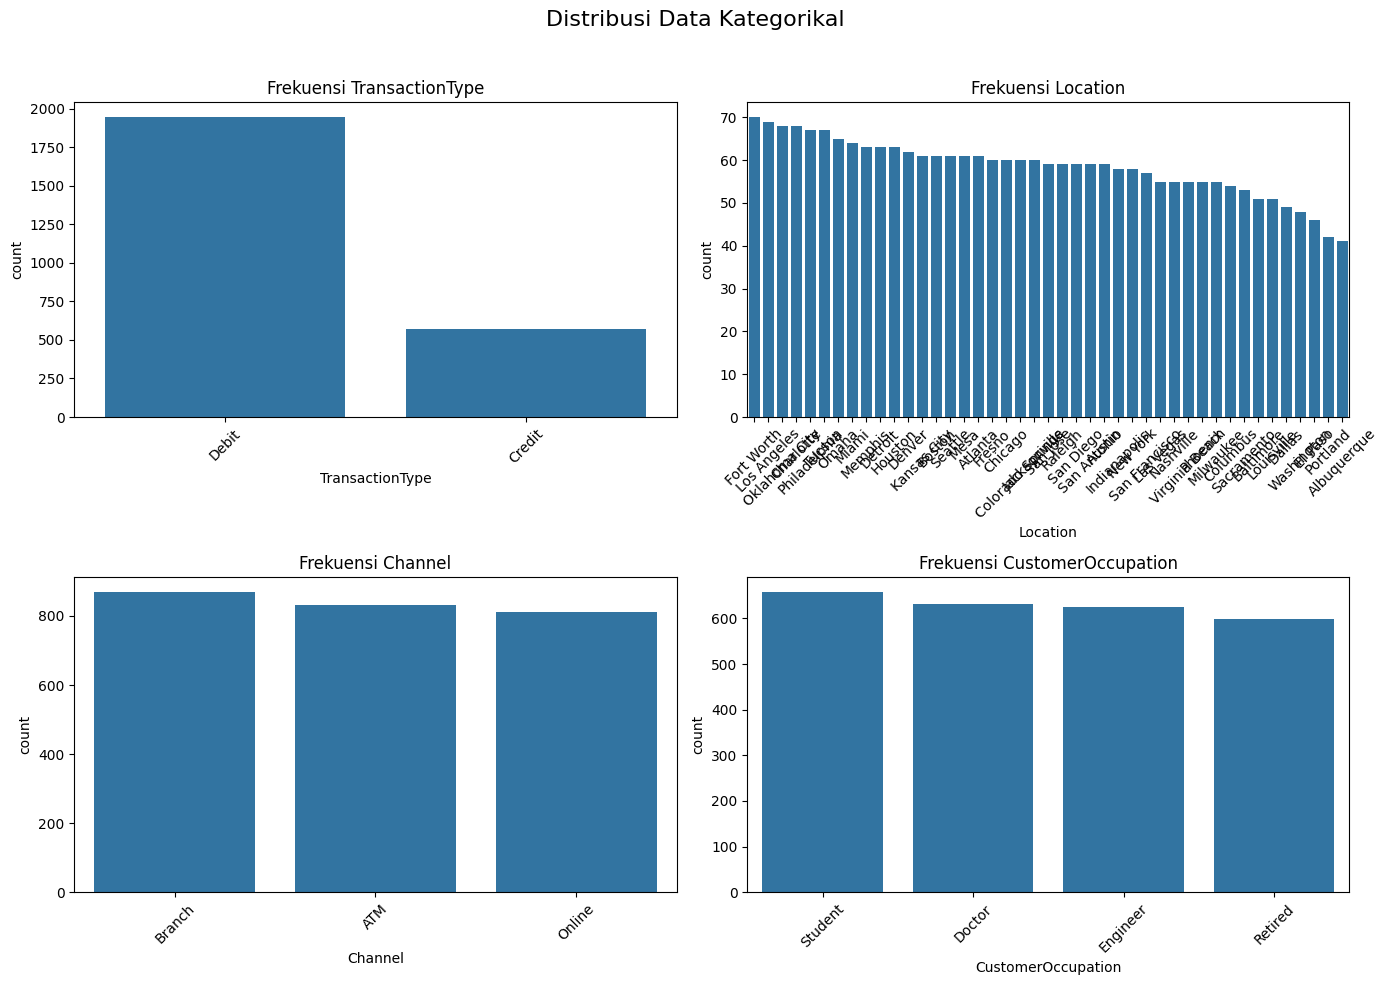

In [ ]:
# Visualisasi Data Kategorikal
categorical_columns = ["TransactionType", "Location", "Channel", "CustomerOccupation"]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Distribusi Data Kategorikal", fontsize=16)

for i, col in enumerate(categorical_columns):
    sns.countplot(x=df[col], order=df[col].value_counts().index, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f"Frekuensi {col}")
    axes[i//2, i%2].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## 1. Menangani Missing Values

In [ ]:
df.dropna(inplace=True)  # Menghapus baris dengan nilai yang hilang
print("\n# Jumlah Data yang Hilang Setelah Penanganan")
print(df.isnull().sum())


# Jumlah Data yang Hilang Setelah Penanganan
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


## 2. Menghapus Duplikat

In [ ]:
df.dropna(inplace=True)  # Menghapus baris dengan nilai yang hilang
print("\n# Jumlah Data yang Hilang Setelah Penanganan")
print(df.isnull().sum())


# Jumlah Data yang Hilang Setelah Penanganan
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


## 3. Normalisasi atau Standarisasi Fitur

In [ ]:
numerical_columns = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

## 4. Deteksi dan Penanganan Outlier

In [ ]:
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

## 5. Encoding Data Kategorikal

In [53]:
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

categorical_columns = ["TransactionType", "Location", "Channel", "CustomerOccupation"]
encoders = {}

df_normalized = df.copy()

for col in categorical_columns:
    encoders[col] = LabelEncoder()
    df_normalized[col] = encoders[col].fit_transform(df_normalized[col])


## 6. Binning

In [54]:
df["CustomerAgeGroup"] = pd.cut(df["CustomerAge"], bins=[18, 30, 50, 80], labels=["Young", "Middle-aged", "Senior"])


## 7. Menampilkan Data Setelah Preprocessing

In [55]:
print("\n# Struktur Data Setelah Preprocessing")
print(df.info())


# Struktur Data Setelah Preprocessing
<class 'pandas.core.frame.DataFrame'>
Index: 2206 entries, 0 to 2511
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   TransactionID            2206 non-null   object  
 1   AccountID                2206 non-null   object  
 2   TransactionAmount        2206 non-null   float64 
 3   TransactionDate          2206 non-null   object  
 4   TransactionType          2206 non-null   object  
 5   Location                 2206 non-null   object  
 6   DeviceID                 2206 non-null   object  
 7   IP Address               2206 non-null   object  
 8   MerchantID               2206 non-null   object  
 9   Channel                  2206 non-null   object  
 10  CustomerAge              2206 non-null   float64 
 11  CustomerOccupation       2206 non-null   object  
 12  TransactionDuration      2206 non-null   float64 
 13  LoginAttempts            2206

## 8. Visualisasi Distribusi Data Setelah Preprocessing

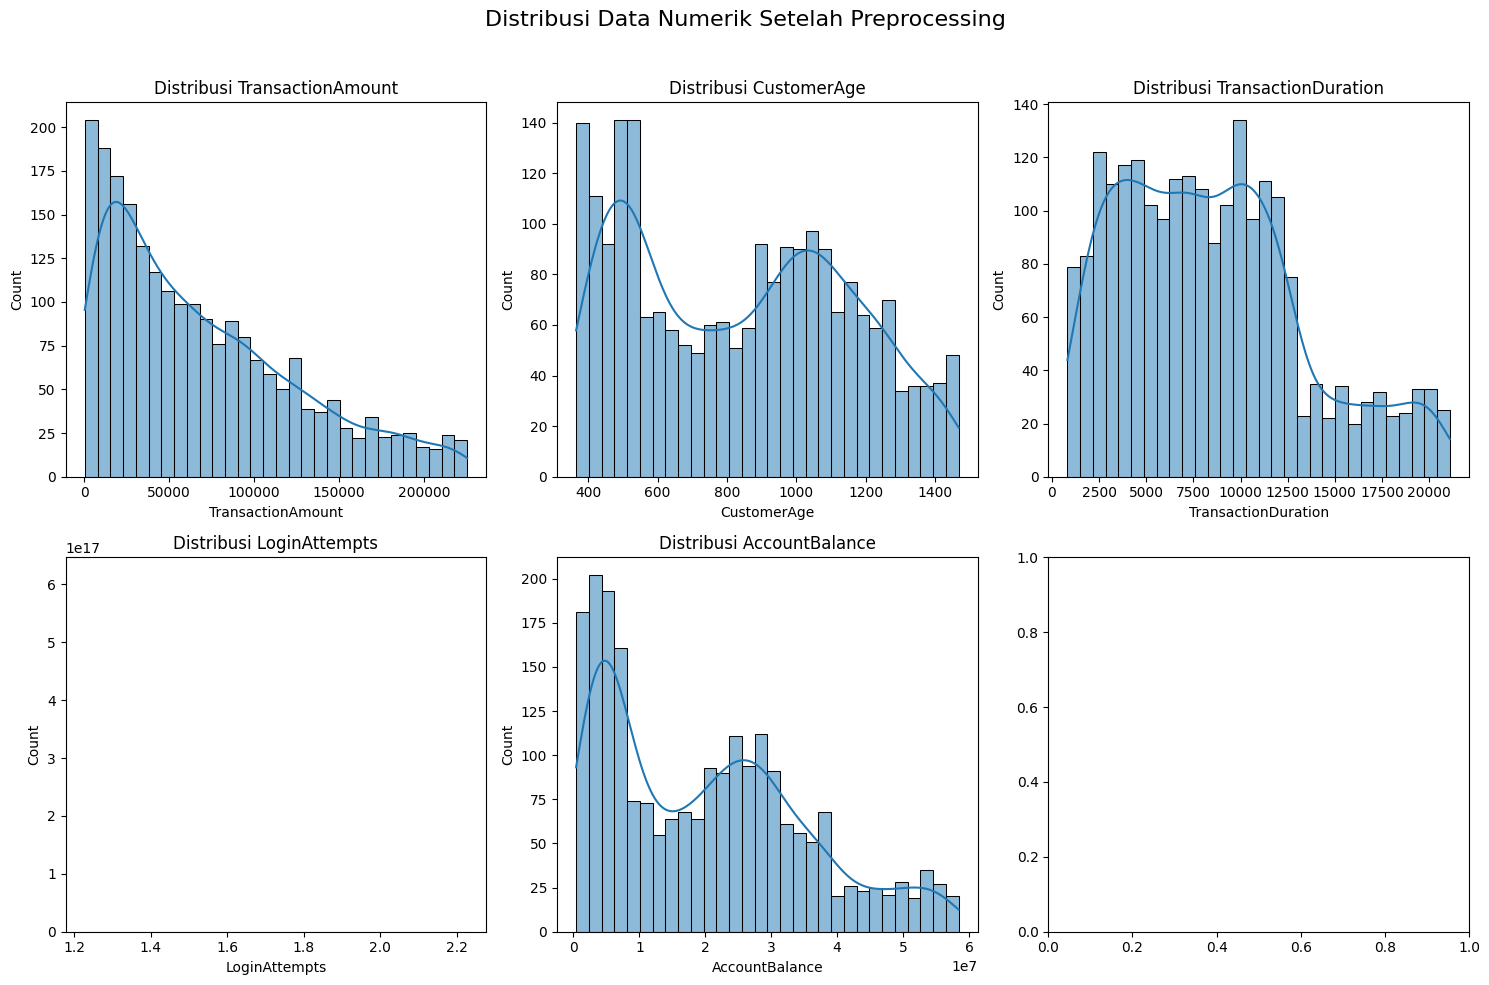

In [56]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Distribusi Data Numerik Setelah Preprocessing", fontsize=16)

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"Distribusi {col}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

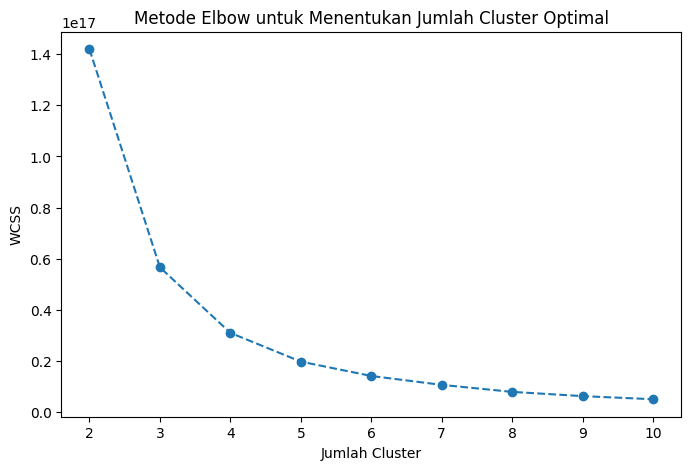

In [57]:
wcss = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df[numerical_columns])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.show()


In [58]:
# Membangun Model KMeans dengan Jumlah Cluster Optimal
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df[numerical_columns])


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [59]:
silhouette_scores = {}
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df[numerical_columns])
    silhouette_scores[k] = silhouette_score(df[numerical_columns], cluster_labels)

optimal_k = max(silhouette_scores, key=silhouette_scores.get)

print(f"Jumlah cluster optimal berdasarkan Silhouette Score: {optimal_k}")

Jumlah cluster optimal berdasarkan Silhouette Score: 3


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

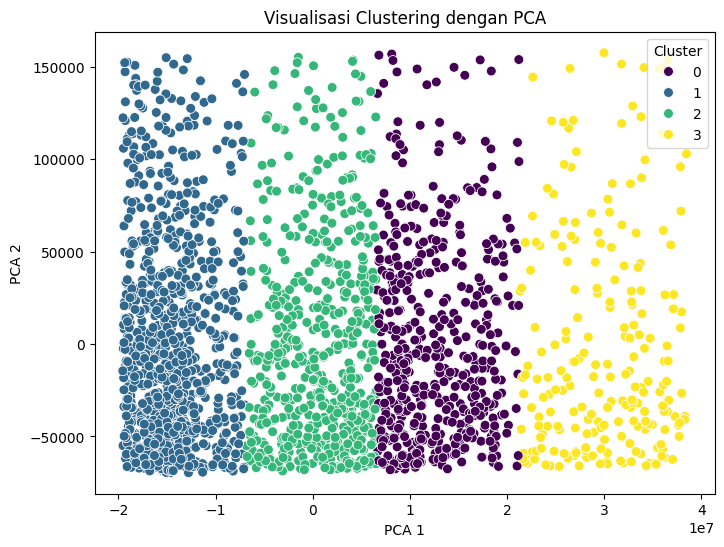

In [60]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[numerical_columns])
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='viridis', s=50)
plt.title('Visualisasi Clustering dengan PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [61]:
# Mengembalikan Data Kategorikal ke Bentuk Asli
for col in categorical_columns:
    df_normalized[col] = encoders[col].inverse_transform(df_normalized[col])

# Menyimpan Hasil Clustering ke Dataset Asli
df_original = df.copy()
df_original['Cluster'] = df_normalized['Cluster']
print("\n# Data Setelah Inverse Transform dan Penambahan Cluster")
print(df_original.head())


# Data Setelah Inverse Transform dan Penambahan Cluster
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128        4410.297491  2023-04-11 16:29:14   
1      TX000002   AC00455      110117.582785  2023-06-27 16:44:19   
2      TX000003   AC00019       37160.145372  2023-07-10 18:16:08   
3      TX000004   AC00070       54150.953261  2023-05-05 16:32:11   
4      TX000005   AC00411        4223.489090  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [41]:
# Inverse Transform untuk Mengembalikan Data ke Skala Asli
df[numerical_columns] = scaler.inverse_transform(df[numerical_columns])
print("\n# Data Setelah Inverse Transform")
print(df.head())


# Data Setelah Inverse Transform
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128        4410.297491  2023-04-11 16:29:14   
1      TX000002   AC00455      110117.582785  2023-06-27 16:44:19   
2      TX000003   AC00019       37160.145372  2023-07-10 18:16:08   
3      TX000004   AC00070       54150.953261  2023-05-05 16:32:11   
4      TX000005   AC00411        4223.489090  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0  1289.879913       

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [65]:
for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    cluster_data = df_original[df_original['Cluster'] == cluster][numerical_columns]
    print(cluster_data.describe())



Cluster 0:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count         629.000000   629.000000           629.000000   6.290000e+02   
mean        70834.099926   508.084019          6915.897586   1.727144e+00   
std         56536.499290   113.242746          3495.849393   6.222197e-15   
min           373.484691   364.869780           819.141608   1.727144e+00   
25%         22542.387958   418.235749          3966.883942   1.727144e+00   
50%         56308.006521   489.390375          6834.826957   1.727144e+00   
75%        102732.813165   542.756344          9842.669631   1.727144e+00   
max        225042.695139   898.529472         14949.007194   1.727144e+00   

       AccountBalance  
count    6.290000e+02  
mean     6.342784e+06  
std      5.911795e+06  
min      4.000061e+05  
25%      2.604263e+06  
50%      4.557583e+06  
75%      6.987464e+06  
max      2.643424e+07  

Cluster 1:
       TransactionAmount  CustomerAge  TransactionDuration  LoginA

**Cluster 0**

* TransactionAmount: Rata-rata transaksi sebesar 70.834 (ribuan) dengan variasi yang cukup besar (std 56.536).

* CustomerAge: Rata-rata usia pelanggan 508 tahun (kemungkinan besar data usia dikodekan dengan skala tertentu).

* TransactionDuration: Waktu transaksi rata-rata 6915 detik (~115 menit).

* LoginAttempts: Sama untuk semua (1.727144), mungkin tidak berkontribusi dalam diferensiasi cluster.

* AccountBalance: Saldo rata-rata 6,34 juta, dengan variasi besar (std 5,91 juta).

Kesimpulan Cluster 0:

Kelompok ini memiliki transaksi dalam jumlah sedang, tidak terlalu kecil atau besar.

Usia pelanggan berada di tengah-tengah dibandingkan cluster lain.

Saldo rekening cukup bervariasi, tetapi lebih rendah dibandingkan cluster lain.

**Cluster 1**

* TransactionAmount: Rata-rata transaksi hampir sama dengan Cluster 0 (69.288 ribuan).

* CustomerAge: Usia pelanggan rata-rata 1152 tahun, jauh lebih tinggi dibandingkan cluster lain (indikasi bahwa data usia mungkin dikodekan).

* TransactionDuration: 6598 detik (~110 menit), sedikit lebih cepat dari Cluster 0.

* AccountBalance: Saldo rata-rata 17,85 juta, lebih tinggi dari Cluster 0.

Kesimpulan Cluster 1:

Kelompok ini memiliki pelanggan lebih tua dibandingkan cluster lain.

Saldo rekening lebih tinggi dibandingkan Cluster 0, mungkin karena pelanggan lebih mapan secara finansial.

Waktu transaksi lebih singkat, bisa jadi karena pelanggan lebih berpengalaman dalam bertransaksi.

**Cluster 2**

* TransactionAmount: Rata-rata transaksi 68.772 ribuan, mirip dengan cluster lain.

* CustomerAge: Usia pelanggan rata-rata 837 tahun, lebih rendah dari Cluster 1 tetapi lebih tinggi dari Cluster 0.

* TransactionDuration: 7140 detik (~119 menit), paling lama dibandingkan cluster lain.

* AccountBalance: Saldo rata-rata 39,31 juta, paling tinggi di antara semua cluster.

Kesimpulan Cluster 2:

Kelompok ini memiliki nasabah dengan saldo rekening tertinggi.

Usia pelanggan menengah, lebih muda dari Cluster 1 tetapi lebih tua dari Cluster 0.

Transaksi berlangsung paling lama, mungkin karena transaksi lebih kompleks atau membutuhkan lebih banyak verifikasi.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
output_file = "bank_transactions_clustered.csv"
df_original.to_csv(output_file, index=False)
print(f"\n# Data telah disimpan ke dalam file: {output_file}")


# Data telah disimpan ke dalam file: bank_transactions_clustered.csv
